In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
import ipykernel
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/ASUS/Belajar/Untitled Folder/confirmed_acc.csv')

In [3]:
df = df.loc[:,['date','cases']]
FMT = '%m/%d/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("3/1/2020", FMT)).days  )

In [4]:
df

,date,cases
0,-39,0
1,-38,0
2,-37,0
3,-36,0
4,-35,0
...,...,...
65,26,1046
66,27,1155
67,28,1285
68,29,1414


In [5]:
df=df.append({'date' : 31, 'cases' : 1677}, ignore_index=True) #1 April
df=df.append({'date' : 32, 'cases' : 1790}, ignore_index=True) #2 April
df=df.append({'date' : 33, 'cases' : 1986}, ignore_index=True) #3 April
df=df.append({'date' : 34, 'cases' : 2092}, ignore_index=True) #4 April
df=df.append({'date' : 35, 'cases' : 2273}, ignore_index=True) #5 April
df=df.append({'date' : 36, 'cases' : 2491}, ignore_index=True) #6 April
df=df.append({'date' : 37, 'cases' : 2738}, ignore_index=True) #7 April
df=df.append({'date' : 38, 'cases' : 2956}, ignore_index=True) #8 April
df=df.append({'date' : 39, 'cases' : 3293}, ignore_index=True) #9 April
df=df.append({'date' : 40, 'cases' : 3512}, ignore_index=True) #10 April

In [6]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [54]:
x = list(df.iloc[39:,0])
y = list(df.iloc[39:,1])
fit = curve_fit(logistic_model,x,y)


In [55]:
fit

(array([   6.8444749 ,   36.88249714, 5549.14247619]),
 array([[8.90333388e-02, 3.06141483e-01, 1.20176618e+02],
        [3.06141483e-01, 1.20863101e+00, 4.82250636e+02],
        [1.20176618e+02, 4.82250636e+02, 1.94711434e+05]]))

In [67]:
A,B=fit
A

array([   6.8444749 ,   36.88249714, 5549.14247619])

In [57]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.29838454856337115, 1.0993775563116106, 441.26118601831496]

In [58]:
#Kemungkinan terburuk
a=A[0]+errors[0]
b=A[1]+errors[1]
c=A[2]+errors[2]


In [70]:
a

7.142859451875531

In [59]:
#Jumlah hari maksimal dari 1 Maret 2020
sol = int(fsolve(lambda x : logistic_model (x,a,b,c) - int(c),b))
sol

106

In [60]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])

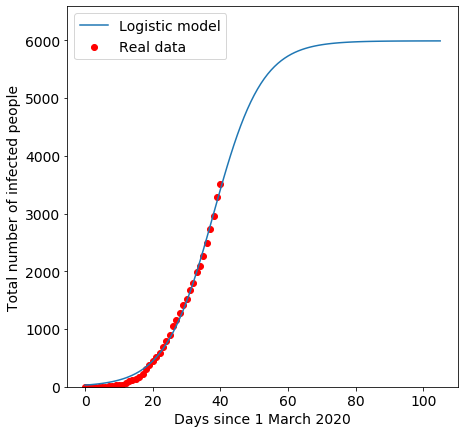

In [61]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,a,b,c) for i in x+pred_x], label="Logistic model" )


plt.legend()
plt.xlabel("Days since 1 March 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

In [62]:
y_pred_logistic = [logistic_model(i,a,b,c) for i in x]
p=mean_squared_error(y,y_pred_logistic)
y_pred_exp =  [exponential_model(i,exp_fit[0][0], exp_fit[0][1], exp_fit[0][2]) for i in x]


s1=(np.subtract(y,y_pred_logistic)**2).sum()
s2=(np.subtract(y,np.mean(y))**2).sum()
r=1-s1/s2
print("R^2 adalah {}".format(r))
print("Mean square errornya adalah {}".format(p))

R^2 adalah 0.9956633258695817
Mean square errornya adalah 4611.917228951483


In [63]:
q=mean_squared_error(y,y_pred_exp)
print("Mean square errornya adalah {}".format(q))

Mean square errornya adalah 14328.67557253473


In [64]:
### Tanggal wabah maksimal
from datetime import timedelta, date
from datetime import datetime  
from datetime import timedelta 

start_date = "01/03/20"

date_1 = datetime.strptime(start_date, "%d/%m/%y")

end_date = date_1 + timedelta(days=sol)

x=end_date.strftime("%d %B %Y")

In [65]:
print("Jumlah kasus maksimal di indonesia menurut prediksi adalah {:f}".format(A[2]+errors[2])) #Penambahan dengan error
print("Wabah akan berakhir {:.0f} hari setelah 1 Maret 2020 atau {}". format(sol,x))

Jumlah kasus maksimal di indonesia menurut prediksi adalah 5990.403662
Wabah akan berakhir 106 hari setelah 1 Maret 2020 atau 15 June 2020
